## Importing Dependencies

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score

## Data Cleaning

In [3]:
df = pd.read_csv(r"C:\Users\rrosh\OneDrive\Desktop\Diabetes Predictor Bot\diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df.shape

(768, 9)

In [18]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [19]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 0 --> Non-Diabetic
### 1 --> Diabetic

In [24]:
# Seperating the data and labels
X = df.drop(columns = 'Outcome',axis=1)
Y = df['Outcome']

In [26]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [27]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Exploratory Data Analysis

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

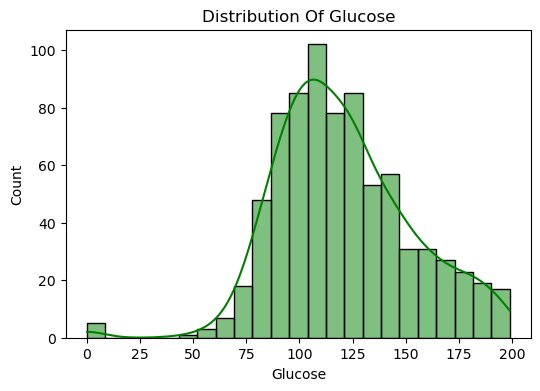

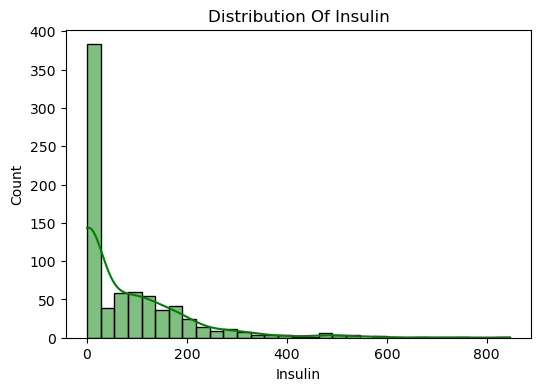

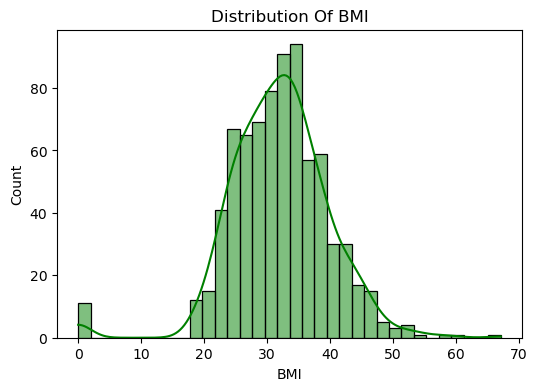

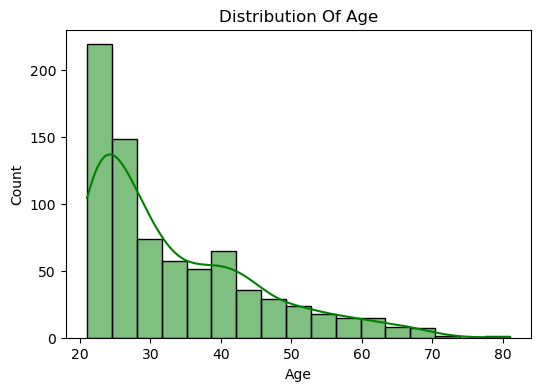

In [31]:
#Distribution Of the Features in the dataset
features = ['Glucose','Insulin','BMI','Age']
for feature in features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[feature],kde = True,color = 'green')
    plt.title(f"Distribution Of {feature}")
    plt.show()

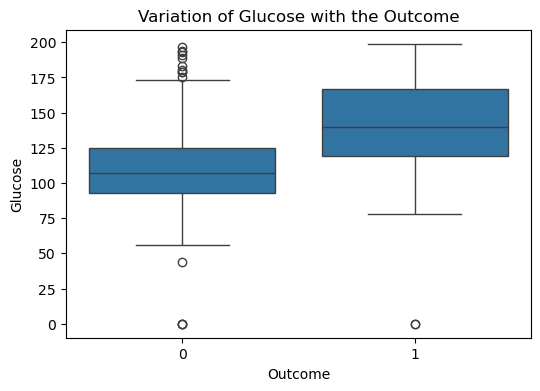

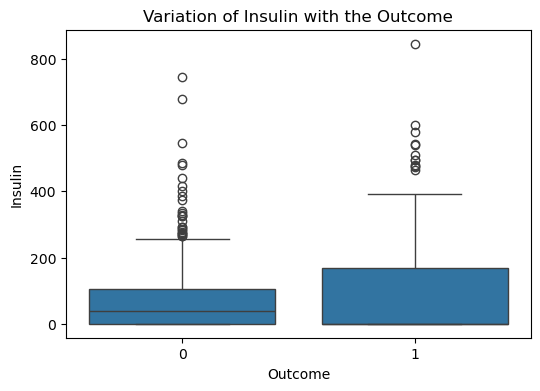

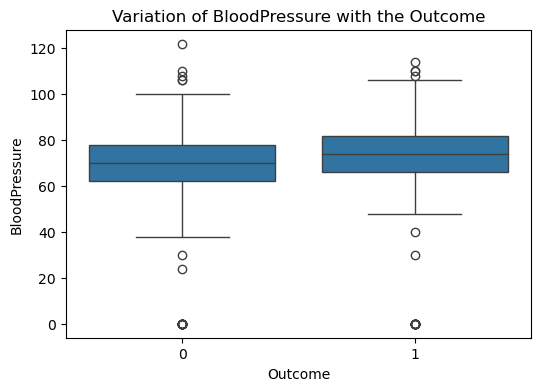

In [36]:
#Glucose vs. outcome
features = ['Glucose','Insulin','BloodPressure']
for feature in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Outcome',y=feature,data = df)
    plt.title(f"Variation of {feature} with the Outcome")
    plt.show()

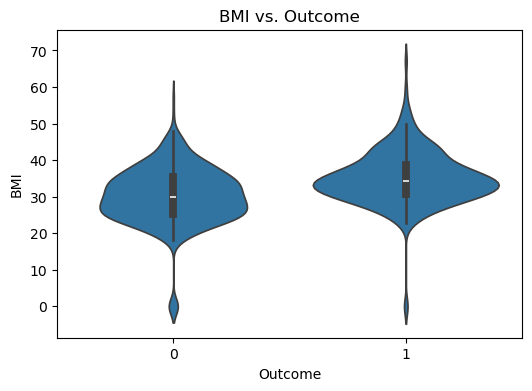

In [37]:
# BMI vs. Outcome
plt.figure(figsize=(6,4))
sns.violinplot(x='Outcome',y='BMI',data = df)
plt.title("BMI vs. Outcome")
plt.show()

### Data Standardization

In [39]:
scaler = StandardScaler()
Standardized_data = scaler.fit_transform(X)

Standardized_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [41]:
Y = df['Outcome']
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### Train Test Split

In [42]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=42)

### Train the Model

In [51]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [52]:
y_pred = model.predict(X_test)

In [56]:
# Evaluation
print("\nAccuracy:", accuracy_score(Y_test, y_pred)*100)
print("\nClassification Report:\n", classification_report(Y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("\nROC-AUC:", roc_auc_score(Y_test, model.predict_proba(X_test)[:,1])*100)


Accuracy: 74.67532467532467

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154


Confusion Matrix:
 [[78 21]
 [18 37]]

ROC-AUC: 81.28558310376492


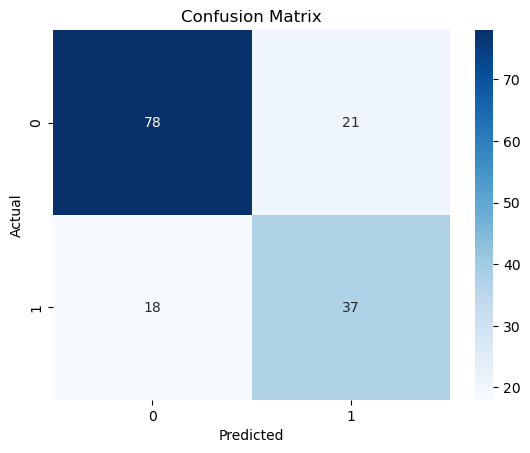

In [57]:
# Confusion Matrix Heatmap
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [61]:
import joblib
joblib.dump(model,"diabetes_predicter_model.pkl")

['diabetes_predicter_model.pkl']